In [1]:
import pandas as pd
import numpy as ny
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Lê dataframe criado com histórico de emprestimos
emprestimos = pd.read_csv('/Users/Clarice Nascimento/0. Alura/emprestimos.csv')
emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,descricao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas


In [3]:
#Filtro para "aluno de graduação"
alunos_graduacao = emprestimos.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
alunos_graduacao.colecao.value_counts()

colecao
Acervo Circulante                        1600155
Multimeios                                  4652
Monografias                                 3572
Dissertações                                1152
Obras de Referência                         1047
Publicações de Autores do RN                 595
Publicações da UFRN                          466
Teses                                        245
Folhetos                                     180
Trabalho Acadêmico                            81
Necessidades Educacionais Específicas         73
Eventos                                       57
Coleção Mossoroense                           17
Coleção Zila Mamede                           15
Literatura de Cordel                          11
Obras Raras                                    6
Name: count, dtype: int64

In [4]:
#Filtro de acervo identificado com maior ocorrencia de empretimos em alunos da graduação
alunos_graduacao_circulante = alunos_graduacao.query('colecao == "Acervo Circulante"')
#Conversão da cokuna de data de emprestimo para datetime, extraindo valores de ano e mês para função agregada
alunos_graduacao_circulante['data_emprestimo'] = pd.to_datetime(alunos_graduacao_circulante['data_emprestimo'])   #,format='%Y-%m-%d')
alunos_graduacao_circulante['ano'] = alunos_graduacao_circulante['data_emprestimo'].dt.year
alunos_graduacao_circulante['mes'] = alunos_graduacao_circulante['data_emprestimo'].dt.month
total_graduacao_circulante = alunos_graduacao_circulante.groupby(['ano','mes'])['id_exemplar'].count().reset_index(name='quantidade')

In [5]:
total_graduacao_circulante

,ano,mes,quantidade
0,2010,1,2996
1,2010,2,7769
2,2010,3,15275
3,2010,4,12430
4,2010,5,12164
...,...,...,...
118,2019,11,8807
119,2019,12,1980
120,2020,1,1781
121,2020,2,8138


In [6]:
#Criando função para utilização do gráfico Boxplot
def plot_boxplot(data,x_col, y_col, title="", xlabel="", ylabel="", palette="Blue"):
    """
    Plota um gráfico de boxplot usando seaborn.

    Parâmetros:
    - data: DataFrame contendo os dados
    - x_col: Nome da coluna para o eixo x
    - y_col: Nome da coluna para o eixo y
    - title: Título do gráfico (opcional)
    - xlabel: Rótulo do eixo x (opcional)
    - ylabel: Rótulo do eixo y (opcional)
    - palette: Paleta de cores do seaborn (opcional)
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x_col, y=y_col, palette=palette)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.show()


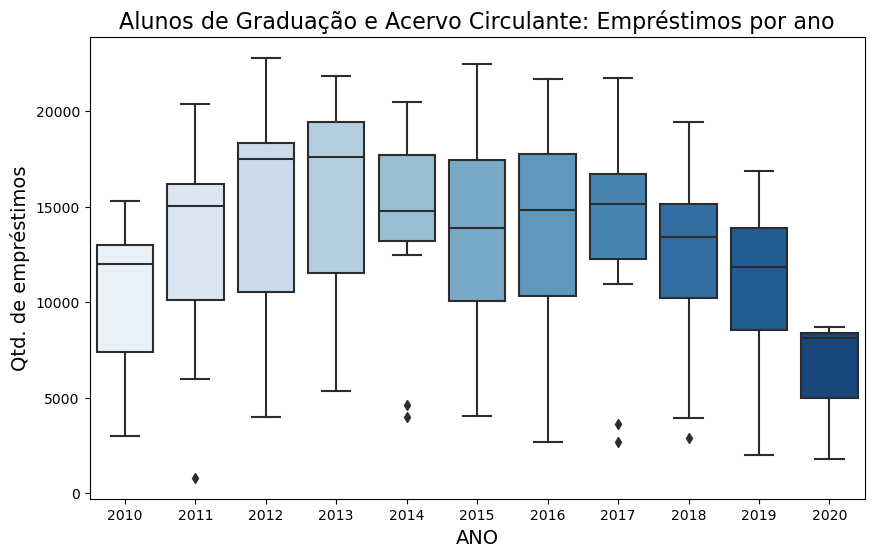

In [7]:
#Definindo parametros para plotagem do gráfico 
plot_boxplot(total_graduacao_circulante,'ano', 'quantidade', title="Alunos de Graduação e Acervo Circulante: Empréstimos por ano", xlabel="ANO", ylabel="Qtd. de empréstimos", palette="Blues")

In [8]:
#Filtro para "aluno de pós graduação"
alunos_pg = emprestimos.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
alunos_pg.colecao.value_counts()

colecao
Acervo Circulante                        299201
Dissertações                                934
Obras de Referência                         700
Multimeios                                  559
Teses                                       367
Monografias                                 278
Publicações de Autores do RN                204
Publicações da UFRN                         121
Folhetos                                     60
Necessidades Educacionais Específicas        30
Eventos                                      26
Coleção Mossoroense                          23
Trabalho Acadêmico                           23
Coleção Zila Mamede                          11
Literatura de Cordel                          4
Name: count, dtype: int64

In [9]:
#Filtro de acervo identificado com maior ocorrencia de empretimos em alunos da pós graduação
alunos_pg_circulante = alunos_pg.query('colecao == "Acervo Circulante"')
#Conversão da cokuna de data de emprestimo para datetime, extraindo valores de ano e mês para função agregada
alunos_pg_circulante['data_emprestimo'] = pd.to_datetime(alunos_pg_circulante['data_emprestimo'])   #,format='%Y-%m-%d')
alunos_pg_circulante['ano'] = alunos_pg_circulante['data_emprestimo'].dt.year
alunos_pg_circulante['mes'] = alunos_pg_circulante['data_emprestimo'].dt.month
total_pg_circulante = alunos_pg_circulante.groupby(['ano','mes'])['id_exemplar'].count().reset_index(name='quantidade')

In [10]:
total_pg_circulante

,ano,mes,quantidade
0,2010,1,1105
1,2010,2,1474
2,2010,3,2919
3,2010,4,2716
4,2010,5,2514
...,...,...,...
119,2019,12,1069
120,2020,1,1143
121,2020,2,1189
122,2020,3,1471


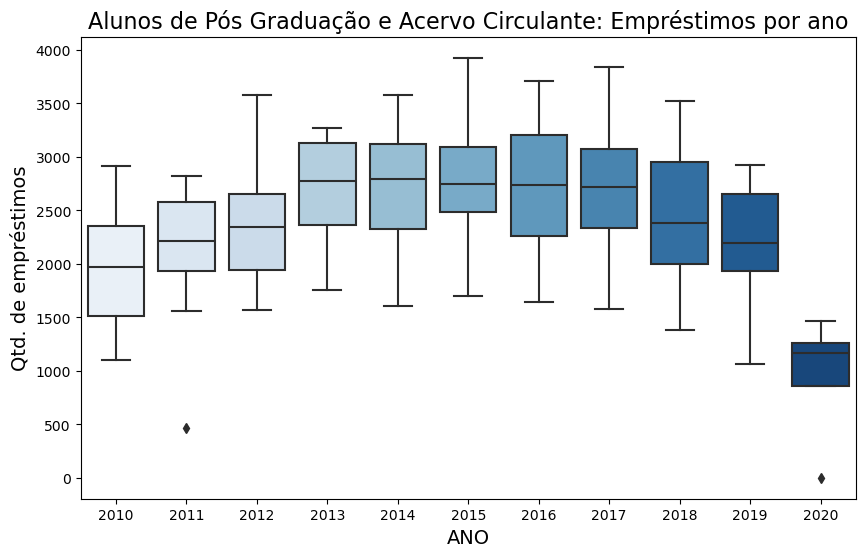

In [11]:
#Definindo parametros para plotagem do gráfico 
plot_boxplot(total_pg_circulante,'ano', 'quantidade', title="Alunos de Pós Graduação e Acervo Circulante: Empréstimos por ano", xlabel="ANO", ylabel="Qtd. de empréstimos", palette="Blues")

Com o boxplot é possível observar a oscilação da quantidade de empréstimos realizados mensalmente durante cada ano quando olhamos para alunos da graduação.

Nos dois gráficos podemos observar um grande aumento entre 2010 e 2013, o que nos leva a pensar em quais procedimentos estavam sendo realizados neste período para que houvesse esse crescimento. E em abos os recortes também temos a partir de 2018 um forte declínio e é um alerta para que a direção possa entender o que está ocorrendo.

importante ressaltar a estabilidade em relação aos emprestimos que foram realizados pelos alunos de pós graduação entre 2023 e 2016 e também a alta variação entre 2014 e 2017 sobre os emprestimos dos alunos de gradução, visto que se excluíssemos os outliers (possivelmente meses de janeiro e dezembro) teríamos anos com uma quantidade constante de empréstimos mensais.